In [1]:
"""
Work from http://epirecip.es/epicookbook/chapters/sir-stochastic-discretestate-discretetime/python
16/11/20
"""

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd
import math

def sir(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery,Y+infection]

def simulate():
    parms = [0.1, 0.05, 0.01, 1000, 1]
    tf = 200
    tl = 2001
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}
    

In [17]:
sir_out = pd.DataFrame(simulate())

In [18]:
sir_out

,t,S,I,R,Y
0,0.0,999.0,1.0,0.0,0.0
1,0.1,999.0,1.0,0.0,0.0
2,0.2,998.0,2.0,0.0,1.0
3,0.3,998.0,2.0,0.0,1.0
4,0.4,998.0,2.0,0.0,1.0
...,...,...,...,...,...
1996,199.6,202.0,0.0,798.0,797.0
1997,199.7,202.0,0.0,798.0,797.0
1998,199.8,202.0,0.0,798.0,797.0
1999,199.9,202.0,0.0,798.0,797.0


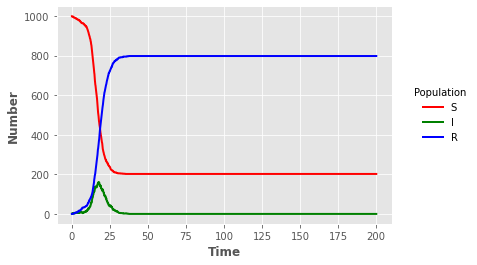

In [19]:
plt.style.use("ggplot")
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)